In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import os as os
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols

In [2]:
# import data file
df = pd.read_csv('admission.csv')

## EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.rename(columns = {'Chance of Admit ' : 'Chance_of_Admit',
                     "LOR " : 'LOR', "GRE Score" : 'GRE_Score', 'University Rating' : 'University_Rating',
                     'Serial No.' : 'Serial_No', 'TOEFL Score' : 'TOEFL_Score'}, 
                     inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.isnull().sum()

Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

In [8]:
df.describe()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df['Research'].unique()

array([1, 0], dtype=int64)

## Modelling - Correlations, Scatter plots, OLS

In [10]:
df.corr()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial_No,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


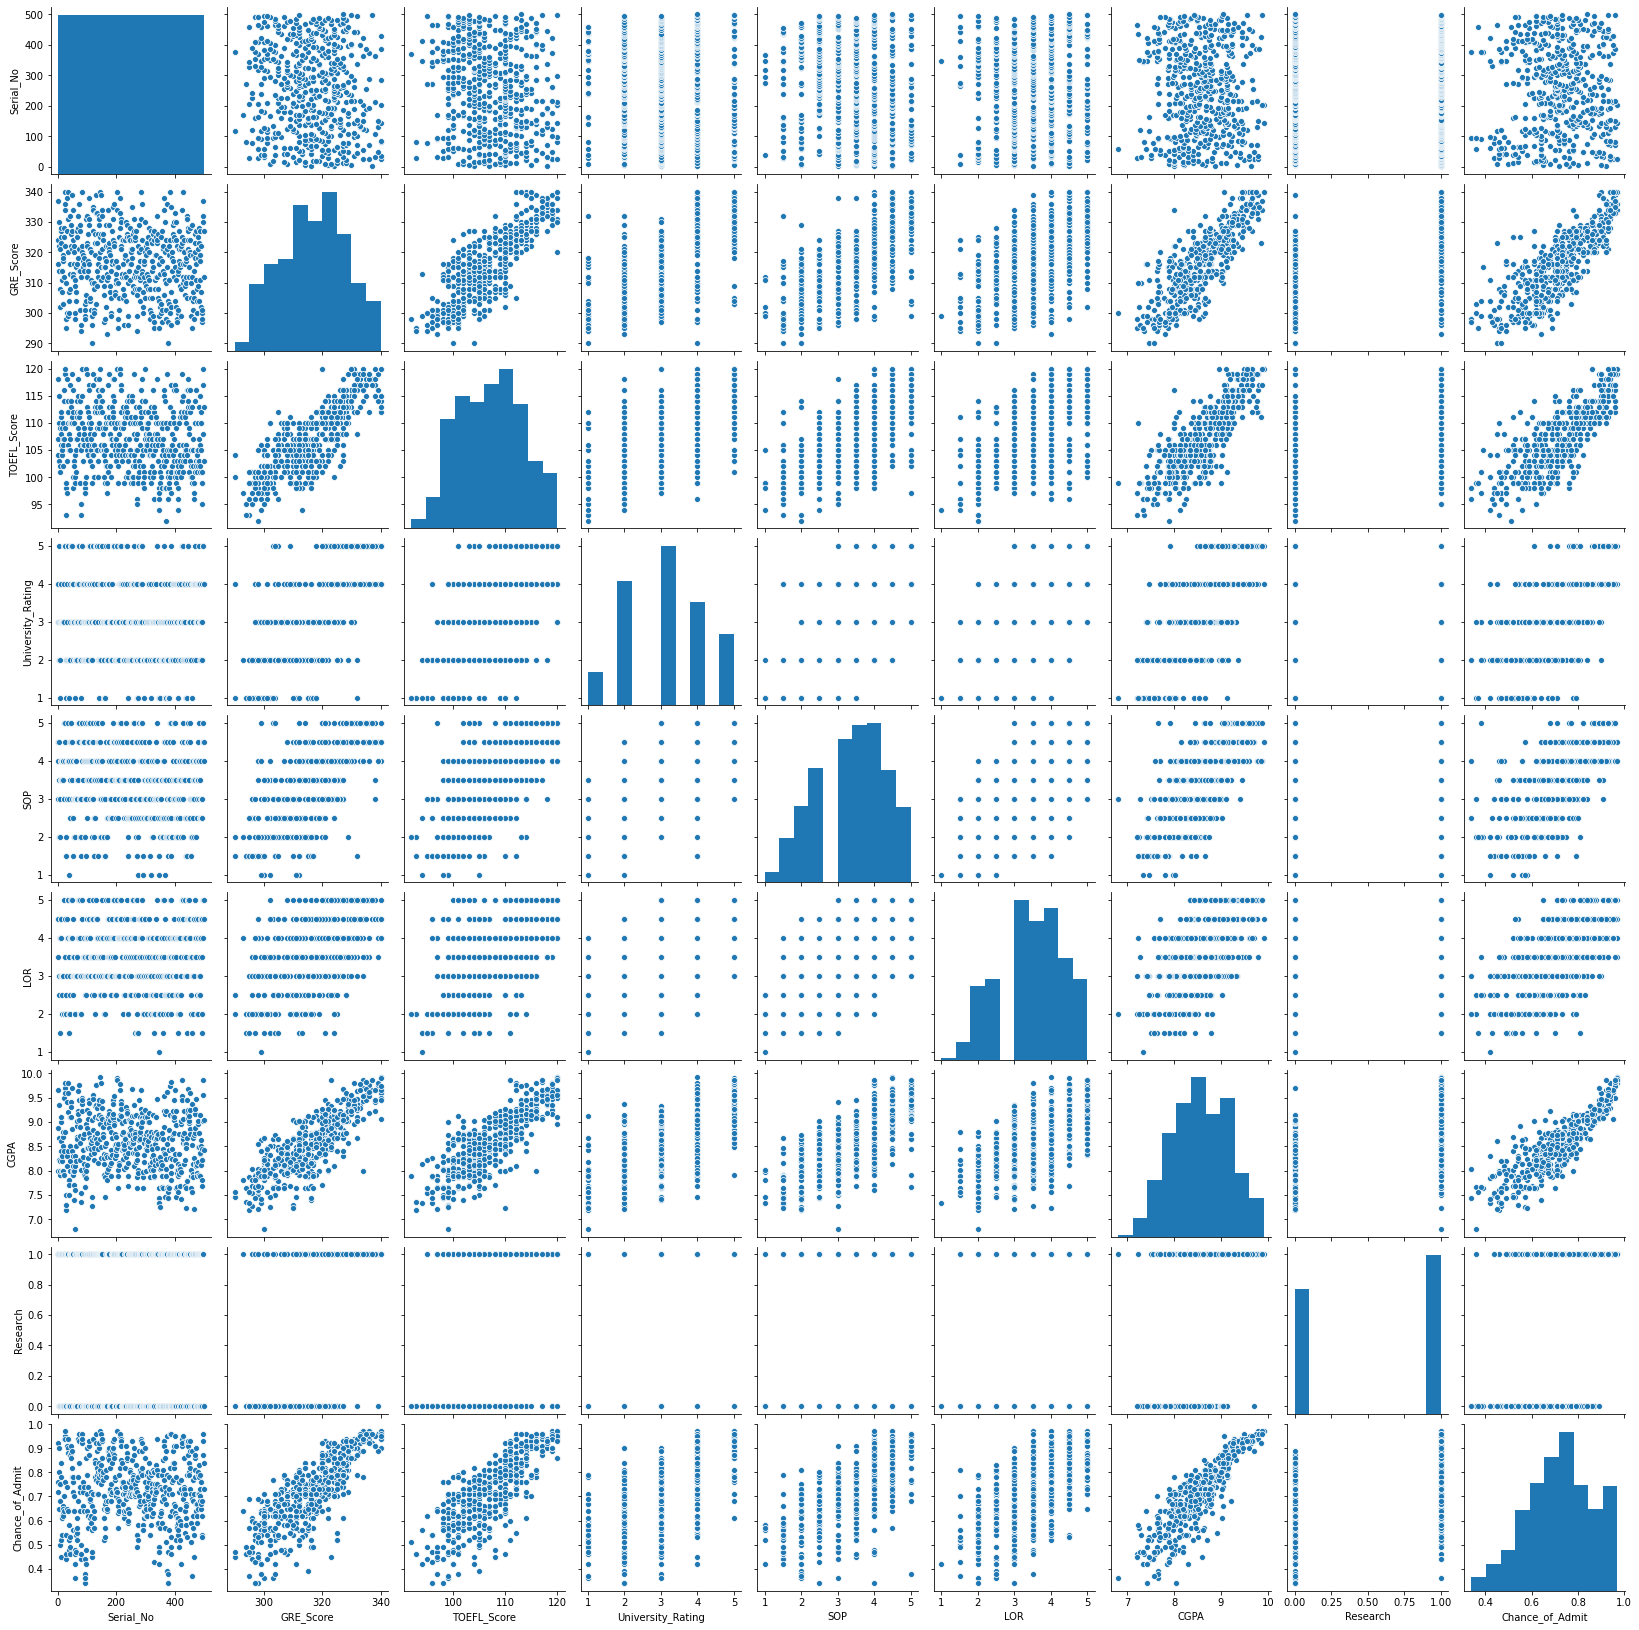

In [11]:
sns.pairplot(df)

In [12]:
model1 = ols('Chance_of_Admit ~ +GRE_Score', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     952.5
Date:                Fri, 21 Aug 2020   Prob (F-statistic):          1.09e-117
Time:                        16:26:50   Log-Likelihood:                 537.30
No. Observations:                 500   AIC:                            -1071.
Df Residuals:                     498   BIC:                            -1062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4828      0.104    -23.896      0.0

In [13]:
model1 = ols('Chance_of_Admit ~ +TOEFL_Score', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     839.4
Date:                Fri, 21 Aug 2020   Prob (F-statistic):          6.73e-109
Time:                        16:26:51   Log-Likelihood:                 516.99
No. Observations:                 500   AIC:                            -1030.
Df Residuals:                     498   BIC:                            -1022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2490      0.068    -18.332      

In [14]:
model1 = ols('Chance_of_Admit ~ +University_Rating', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     452.9
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           5.87e-72
Time:                        16:26:51   Log-Likelihood:                 431.73
No. Observations:                 500   AIC:                            -859.5
Df Residuals:                     498   BIC:                            -851.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4565      0.01

In [15]:
model1 = ols('Chance_of_Admit ~ +SOP', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     438.2
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           2.89e-70
Time:                        16:26:51   Log-Likelihood:                 427.83
No. Observations:                 500   AIC:                            -851.7
Df Residuals:                     498   BIC:                            -843.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3930      0.016     24.011      0.0

In [16]:
model1 = ols('Chance_of_Admit ~ +LOR', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     355.5
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           3.07e-60
Time:                        16:26:51   Log-Likelihood:                 404.71
No. Observations:                 500   AIC:                            -805.4
Df Residuals:                     498   BIC:                            -797.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3788      0.019     20.132      0.0

In [17]:
model1 = ols('Chance_of_Admit ~ +CGPA', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1752.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):          3.40e-165
Time:                        16:26:51   Log-Likelihood:                 647.04
No. Observations:                 500   AIC:                            -1290.
Df Residuals:                     498   BIC:                            -1282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0443      0.042    -24.689      0.0

In [18]:
model1 = ols('Chance_of_Admit ~ +Research', df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     211.4
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           3.60e-40
Time:                        16:26:51   Log-Likelihood:                 358.48
No. Observations:                 500   AIC:                            -713.0
Df Residuals:                     498   BIC:                            -704.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6349      0.008     79.554      0.0

Based on the model summary of each feature, CGPA has the highest R2 of 0.779. Both TOEFL_Score and GRE_Score have R2 of 0.628 and 0.657 respectively.

R2 of University_Rating, SOP, LOR and Research are 0.476, 0.468, 0.416 and 0.298, Should these features be ignored ? 

In [19]:
model2 = ols('Chance_of_Admit ~ +CGPA+GRE_Score+TOEFL_Score+LOR+Research', df).fit()
print(model2.summary())

#+GRE_Score+TOEFL_Score+University_Rating+SOP+LOR+Research

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Fri, 21 Aug 2020   Prob (F-statistic):          9.97e-182
Time:                        16:26:51   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3357      0.099    -13.482      

## OLS results interpretation

Prob (F-statistic): 1.29e-05(eg). This is the p-value associated with the overall F-statistic.  It tells us whether or not the regression model as a whole is statistically significant. In other words, it tells us if the two predictor variables combined have a statistically significant association with the response variable. In this case the p-value is less than 0.05, which indicates that the predictor variables “hours studied” and “prep exams taken” combined have a statistically significant association with exam score.


coef: The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant.

R-squared: 0.734(eg). This is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. In this example, 73.4% of the variation in the exam scores can be explained by the number of hours studied and the number of prep exams taken.


P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant. We can see that “hours” is statistically significant (p = 0.00) while “exams” (p = 0.52) is not statistically significant at α = 0.05. Since “exams” is not statistically significant, we may end up deciding to remove it from the model.

Once you perform linear regression, there are several assumptions you may want to check to ensure that the results of the regression model are reliable. These assumptions include:

Assumption #1: There exists a linear relationship between the predictor variables and the response variable.

- Check this assumption by generating a residual plot that displays the fitted values against the residual values for a regression model.

Assumption #2: Independence of residuals.

- Check this assumption by performing a Durbin-Watson Test.

Assumption #3: Homoscedasticity of residuals.

- Check this assumption by performing a Breusch-Pagan Test.

Assumption #4: Normality of residuals.

- Check this assumption visually using a Q-Q plot.
- Check this assumption with formal tests like a Jarque-Bera Test or an Anderson-Darling Test.

Assumption #5: Verify that multicollinearity doesn’t exist among predictor variables.

- Check this assumption by calculating the VIF value of each predictor variable.

If these assumptions are met, you can be confident that the results of your multiple linear regression model are reliable



In [36]:
# Assumption #2: Independence of residuals
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model2.resid)


#A test statistic of 2 indicates no serial correlation.
#The closer the test statistics is to 0, the more evidence of positive serial correlation.
#The closer the test statistics is to 4, the more evidence of negative serial correlation.

0.7999518323627174

In [39]:
# Assumption #5 : Verify that multicollinearity doesn’t exist among predictor variables. 
# Check this assumption by calculating the VIF value of each predictor variable.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Chance_of_Admit ~ +CGPA+GRE_Score+TOEFL_Score+LOR+Research', data=df, return_type='dataframe')
print(y.head())
print(X.head())

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif


#The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:
#A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables 
# in the model.
#A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables
# in the model, but this is often not severe enough to require attention.
#A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory
# variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

   Chance_of_Admit
0             0.92
1             0.76
2             0.72
3             0.80
4             0.65
   Intercept  CGPA  GRE_Score  TOEFL_Score  LOR  Research
0        1.0  9.65      337.0        118.0  4.5       1.0
1        1.0  8.87      324.0        107.0  4.5       1.0
2        1.0  8.00      316.0        104.0  3.5       1.0
3        1.0  8.67      322.0        110.0  2.5       1.0
4        1.0  8.21      314.0        103.0  3.0       0.0


,VIF,variable
0,1360.025682,Intercept
1,4.376495,CGPA
2,4.452473,GRE_Score
3,3.799455,TOEFL_Score
4,1.704623,LOR
5,1.486588,Research


+CGPA+GRE_Score
                           OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799

                coef    std err          t      P>|t|      [0.025      0.975]
Intercept     -1.6350      0.091    -17.901      0.000      -1.814      -1.456
CGPA           0.1565      0.008     18.826      0.000       0.140       0.173
GRE_Score      0.0032      0.000      7.206      0.000       0.002       0.004
Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

+CGPA+TOEFL_Score
Dep. Variable:        Chance_of_Admit   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795

               coef    std err          t      P>|t|      [0.025      0.975]
ntercept      -1.2385      0.050    -24.529      0.000      -1.338      -1.139
CGPA            0.1635      0.008     20.245      0.000       0.148       0.179
TOEFL_Score     0.0052      0.001      6.486      0.000       0.004       0.007

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

+CGPA+GRE_Score+TOEFL_Score
Dep. Variable:        Chance_of_Admit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803

                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5968      0.091    -17.566      0.000      -1.775      -1.418
CGPA            0.1436      0.009     16.003      0.000       0.126       0.161
GRE_Score       0.0024      0.001      4.697      0.000       0.001       0.003
TOEFL_Score     0.0032      0.001      3.573      0.000       0.001       0.005

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

+CGPA+GRE_Score+TOEFL_Score+University_Rating
Dep. Variable:        Chance_of_Admit   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4648      0.098    -14.988      0.000      -1.657      -1.273
CGPA                  0.1325      0.009     14.029      0.000       0.114       0.151
GRE_Score             0.0023      0.000      4.573      0.000       0.001       0.003
TOEFL_Score           0.0028      0.001      3.080      0.002       0.001       0.005
University_Rating     0.0120      0.003      3.448      0.001       0.005       0.019

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

+CGPA+GRE_Score+TOEFL_Score+University_Rating+SOP
Dep. Variable:        Chance_of_Admit   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4386      0.099    -14.576      0.000      -1.633      -1.245
CGPA                  0.1280      0.010     13.104      0.000       0.109       0.147
GRE_Score             0.0023      0.000      4.651      0.000       0.001       0.003
TOEFL_Score           0.0026      0.001      2.900      0.004       0.001       0.004
University_Rating     0.0091      0.004      2.346      0.019       0.001       0.017
SOP                   0.0078      0.004      1.736      0.083      -0.001       0.017
Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

+CGPA+GRE_Score+TOEFL_Score+University_Rating+SOP+LOR
Dep. Variable:        Chance_of_Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4268      0.097    -14.695      0.000      -1.618      -1.236
CGPA                  0.1192      0.010     12.137      0.000       0.100       0.139
GRE_Score             0.0024      0.000      4.897      0.000       0.001       0.003
TOEFL_Score           0.0026      0.001      2.974      0.003       0.001       0.004
University_Rating     0.0067      0.004      1.747      0.081      -0.001       0.014
SOP                   0.0019      0.005      0.417      0.677      -0.007       0.011
LOR                   0.0177      0.004      4.231      0.000       0.009       0.026

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.



+GRE_Score+TOEFL_Score+University_Rating+SOP+LOR+Research
Dep. Variable:        Chance_of_Admit   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4426      0.118    -12.238      0.000      -1.674      -1.211
GRE_Score             0.0043      0.001      8.151      0.000       0.003       0.005
TOEFL_Score           0.0058      0.001      6.053      0.000       0.004       0.008
University_Rating     0.0126      0.004      2.927      0.004       0.004       0.021
SOP                   0.0117      0.005      2.292      0.022       0.002       0.022
LOR                   0.0274      0.005      5.938      0.000       0.018       0.036
Research              0.0263      0.008      3.487      0.001       0.011       0.041

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

+TOEFL_Score+University_Rating+SOP+LOR+Research
Dep. Variable:        Chance_of_Admit   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6610      0.073     -9.061      0.000      -0.804      -0.518
TOEFL_Score           0.0108      0.001     13.998      0.000       0.009       0.012
University_Rating     0.0166      0.005      3.664      0.000       0.008       0.026
SOP                   0.0136      0.005      2.492      0.013       0.003       0.024
LOR                   0.0286      0.005      5.824      0.000       0.019       0.038
Research              0.0460      0.008      6.065      0.000       0.031       0.061

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

+GRE_Score+University_Rating+SOP+LOR+Research
Dep. Variable:        Chance_of_Admit   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5086      0.122    -12.413      0.000      -1.747      -1.270
GRE_Score             0.0064      0.000     15.322      0.000       0.006       0.007
University_Rating     0.0161      0.004      3.648      0.000       0.007       0.025
SOP                   0.0166      0.005      3.167      0.002       0.006       0.027
LOR                   0.0290      0.005      6.092      0.000       0.020       0.038
Research              0.0243      0.008      3.121      0.002       0.009       0.040

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

+CGPA+University_Rating+SOP+LOR+Research
Dep. Variable:        Chance_of_Admit   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7675      0.054    -14.200      0.000      -0.874      -0.661
CGPA                  0.1605      0.008     21.026      0.000       0.145       0.175
University_Rating     0.0092      0.004      2.351      0.019       0.002       0.017
SOP                   0.0033      0.005      0.706      0.481      -0.006       0.013
LOR                   0.0153      0.004      3.558      0.000       0.007       0.024
Research              0.0347      0.007      5.291      0.000       0.022       0.048

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


+CGPA+GRE_Score+TOEFL_Score+University_Rating+SOP+LOR+Research 

Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2757      0.104    -12.232      0.000      -1.481      -1.071
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
GRE_Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL_Score           0.0028      0.001      3.184      0.002       0.001       0.004
University_Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
Research              0.0243      0.007      3.680      0.000       0.011       0.037

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.



+CGPA+GRE_Score+TOEFL_Score+LOR+Research+University_Rating
Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2800      0.103    -12.371      0.000      -1.483      -1.077
CGPA                  0.1190      0.010     12.481      0.000       0.100       0.138
GRE_Score             0.0019      0.001      3.694      0.000       0.001       0.003
TOEFL_Score           0.0028      0.001      3.236      0.001       0.001       0.005
LOR                   0.0173      0.004      4.380      0.000       0.010       0.025
Research              0.0244      0.007      3.691      0.000       0.011       0.037
University_Rating     0.0064      0.004      1.820      0.069      -0.001       0.013

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


## +CGPA+GRE_Score+TOEFL_Score+LOR+Research
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3357      0.099    -13.482      0.000      -1.530      -1.141
CGPA            0.1230      0.009     13.221      0.000       0.105       0.141
GRE_Score       0.0019      0.001      3.760      0.000       0.001       0.003
TOEFL_Score     0.0030      0.001      3.501      0.001       0.001       0.005
LOR             0.0193      0.004      5.092      0.000       0.012       0.027
Research        0.0252      0.007      3.814      0.000       0.012       0.038

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.




## Transformation

In [20]:
from sklearn import preprocessing

In [21]:
df['Chance_of_Admit_scale'] = preprocessing.scale(df["Chance_of_Admit"]) #normalisation

df['Chance_of_Admit_log'] = np.log(df["Chance_of_Admit"])

df['Chance_of_Admit_sqrt'] = np.sqrt(df["Chance_of_Admit"])

In [22]:
model3 = ols('Chance_of_Admit_sqrt ~ +CGPA+GRE_Score+TOEFL_Score+University_Rating+SOP+LOR+Research', df).fit()
print(model3.summary())

                             OLS Regression Results                             
Dep. Variable:     Chance_of_Admit_sqrt   R-squared:                       0.798
Model:                              OLS   Adj. R-squared:                  0.795
Method:                   Least Squares   F-statistic:                     276.9
Date:                  Fri, 21 Aug 2020   Prob (F-statistic):          3.67e-166
Time:                          16:26:51   Log-Likelihood:                 919.24
No. Observations:                   500   AIC:                            -1822.
Df Residuals:                       492   BIC:                            -1789.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         

Y-scale
R-squared:                       0.822
Adj. R-squared:                  0.819

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -14.1665      0.740    -19.152      0.000     -15.620     -12.713
CGPA                  0.8396      0.069     12.198      0.000       0.704       0.975
GRE_Score             0.0132      0.004      3.700      0.000       0.006       0.020
TOEFL_Score           0.0197      0.006      3.184      0.002       0.008       0.032
University_Rating     0.0421      0.027      1.563      0.119      -0.011       0.095
SOP                   0.0112      0.032      0.348      0.728      -0.052       0.075
LOR                   0.1196      0.029      4.074      0.000       0.062       0.177
Research              0.1724      0.047      3.680      0.000       0.080       0.264

Y-log
R-squared:                       0.765
Adj. R-squared:                  0.762

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.2675      0.179    -18.268      0.000      -3.619      -2.916
CGPA                  0.1796      0.017     10.791      0.000       0.147       0.212
GRE_Score             0.0027      0.001      3.145      0.002       0.001       0.004
TOEFL_Score           0.0037      0.001      2.452      0.015       0.001       0.007
University_Rating     0.0038      0.007      0.582      0.561      -0.009       0.017
SOP                  -0.0006      0.008     -0.073      0.942      -0.016       0.015
LOR                   0.0290      0.007      4.081      0.000       0.015       0.043
Research              0.0332      0.011      2.932      0.004       0.011       0.055


Y-sqrt
R-squared:                       0.798
Adj. R-squared:                  0.795

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3562      0.067     -5.280      0.000      -0.489      -0.224
CGPA                  0.0725      0.006     11.548      0.000       0.060       0.085
GRE_Score             0.0011      0.000      3.441      0.001       0.000       0.002
TOEFL_Score           0.0016      0.001      2.812      0.005       0.000       0.003
University_Rating     0.0026      0.002      1.050      0.294      -0.002       0.007
SOP                   0.0004      0.003      0.150      0.881      -0.005       0.006
LOR                   0.0110      0.003      4.109      0.000       0.006       0.016
Research              0.0142      0.004      3.322      0.001       0.006       0.023


## Fit Linear Regression

In [23]:
# Fit linear regression
X = df[['CGPA','GRE_Score','TOEFL_Score','Research','LOR']] #'University_Rating','LOR','SOP','CGPA','GRE_Score','TOEFL_Score' 
y = df['Chance_of_Admit']

reg = LinearRegression().fit(X, y)
R2 = reg.score(X, y)
coefficients = reg.coef_
intercept = reg.intercept_

print('y intercept : ', intercept)
print('coefficients :', coefficients)
print('R2 :', R2)

y intercept :  -1.3357017687406532
coefficients : [0.12297978 0.00188918 0.00301736 0.02516487 0.01932025]
R2 : 0.8206600544799475


## Model Training and Testing

In [24]:
# create training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# fit the model with training data
model = LinearRegression().fit(X_train, y_train)

In [26]:
# model - intercept, coefficients and R2 

model_intercept = model.intercept_
model_coeff = model.coef_
model_R2 = model.score(X_train, y_train)

print("y-intercept : ", model_intercept)
print("coefficients : ", model_coeff)
print("R2 : ", model_R2)


y-intercept :  -1.4554898525199826
coefficients :  [0.11499988 0.00245348 0.00314046 0.02460129 0.01869556]
R2 :  0.8207326947514395


In [27]:
# predict y using the model with test data
y_pred = model.predict(X_test)
#y_pred_train = model.predict(X_train)

In [28]:
# error of model
error = mean_squared_error(y_test, y_pred)
print('error : ', error)

error :  0.0037730207651168863


In [29]:
# fit the model with test data
model_test = LinearRegression().fit(X_test, y_test)

print("model_test_R2 : ", model_test.score(X_test, y_test))

model_test_R2 :  0.8347481846791465


## Null Hypothesis and Alternate Hypothesis

Null Hypothesis = Chance of admission is not dependent on the following features : 
- CGPA
- GRE_Score
- TOEFL_Score
- Research
- University_Rating
- LOR
- SOP

Alternate Hypothesis = Chance of admission is dependent on the above features.


In [30]:
df['Chance_of_Admit'].describe()

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance_of_Admit, dtype: float64

In [31]:
# collect data
df_chance50up = df[df['Chance_of_Admit'] >= 0.72]
df_chance50below = df[df['Chance_of_Admit']< 0.72]
df_50up = df_chance50up.sample(50)
df_50below = df_chance50below.sample(50)


In [32]:
# Calculate point estimate
a = df_50up['Chance_of_Admit']
b = df_50below['Chance_of_Admit']

## Calculate the variance to get the standard deviation
var_a = a.var()
var_b = b.var()

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
N=100
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
print("t = " + str(t))

## Calculate the p-value
from scipy import stats 

temp_df = 2*N - 2

# p-value after comparison with the t 
p = 1 - stats.t.cdf(t, df=temp_df)
print("p = " + str(2*p))

# cross-checkings
t2, p2 = stats.ttest_ind(a,b)
print("t check = " + str(t2))
print("p check = " + str(p2))

t = 16.52537152927271
p = 0.0
t check = 11.685202269975834
p check = 2.810094203960674e-20


In [33]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [34]:
alpha = 0.05
print_sig(p, alpha)

We reject our null hypothesis.
